# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-07-16 09:06:59.221914


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/15/20


,7/15/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,3497847,137407,3.93
Brazil,1966748,75366,3.83
United Kingdom,293469,45138,15.38
Mexico,317635,36906,11.62
Italy,243506,34997,14.37
France,210568,30123,14.31
Spain,257494,28413,11.03


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 7/15/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
30445,US,3364157,2020-07-13,135566.0,361.0,59215.0,61154.285714
30444,US,3304942,2020-07-12,135205.0,428.0,59017.0,59116.857143
30443,US,3245925,2020-07-11,134777.0,685.0,61352.0,57812.000000
30442,US,3184573,2020-07-10,134092.0,802.0,66627.0,55601.714286
30441,US,3117946,2020-07-09,133290.0,990.0,63247.0,53699.571429
30440,US,3054699,2020-07-08,132300.0,820.0,58601.0,52444.428571
30439,US,2996098,2020-07-07,131480.0,1195.0,60021.0,51383.428571


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/15/20


,7/15/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,404006,32427.0,8.03
New Jersey,176278,15634.0,8.87
Massachusetts,112347,8368.0,7.45
Illinois,157825,7427.0,4.71
California,354885,7375.0,2.08
Pennsylvania,102269,6957.0,6.80
Michigan,78913,6330.0,8.02


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 7/15/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1053,California,333357,2020-07-13,7089.0,38.0,8814.0,8903.142857
1052,California,324543,2020-07-12,7051.0,24.0,5782.0,8551.714286
1051,California,318761,2020-07-11,7027.0,72.0,7876.0,9409.428571
1050,California,310885,2020-07-10,6955.0,96.0,8401.0,8624.428571
1049,California,302484,2020-07-09,6859.0,141.0,9924.0,7990.571429
1048,California,292560,2020-07-08,6718.0,145.0,8548.0,7697.000000
1047,California,284012,2020-07-07,6573.0,132.0,12977.0,7513.428571


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' COVID-19 cases by county as of', mostrecentdatecases)
casessummary



Number of confirmed California COVID-19 cases by county as of 7/15/20


,7/15/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,143207,3943.0,2.75
Riverside,27371,577.0,2.11
Orange,27031,455.0,1.68
San Diego,21446,448.0,2.09
San Bernardino,21468,310.0,1.44
Santa Clara,6951,173.0,2.49
Alameda,8478,154.0,1.82


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 7/15/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3341,Los Angeles,136357,2020-07-13,3824.0,15.0,2808.0,2826.714286
3340,Los Angeles,133549,2020-07-12,3809.0,14.0,3155.0,2646.428571
3339,Los Angeles,130394,2020-07-11,3795.0,51.0,2955.0,3224.000000
3338,Los Angeles,127439,2020-07-10,3744.0,54.0,2447.0,2804.714286
3337,Los Angeles,124992,2020-07-09,3690.0,47.0,1736.0,2457.142857
3336,Los Angeles,123256,2020-07-08,3643.0,61.0,2492.0,2513.000000
3335,Los Angeles,120764,2020-07-07,3582.0,48.0,4194.0,2416.285714
3334,Los Angeles,116570,2020-07-06,3534.0,47.0,1546.0,2230.285714
3333,Los Angeles,115024,2020-07-05,3487.0,30.0,7198.0,2443.714286
3332,Los Angeles,107826,2020-07-04,3457.0,0.0,20.0,1777.285714



7 day new US cases as of 7/15/20


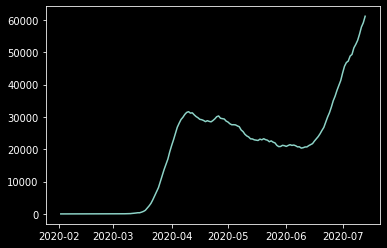

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 7/15/20


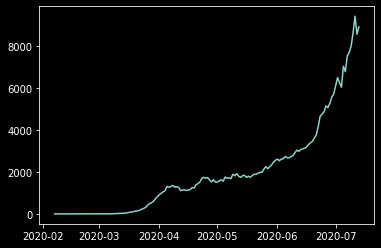

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 7/15/20


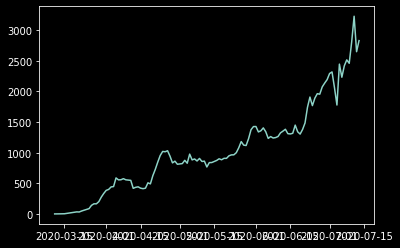

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countyDataTA["Rolling7Average"])

plt.show()